<h1 style="color:red">Customer Churn Analysis Using Logistic Regression</h1>
<p><b>By:</b> Mir Habeebullah Shah Quadri<br><b>Dept:</b> AI<br><b>Roll.No: </b> 18B81DA914</p>
<h4 style="color:red">Problem Statement:</h4>
<p>Apply Logistic Regression to analyse the customer churn in a telecom company.</p>
<h4 style="color:blue">Solution</h4>

<p><b>Step 1:</b> Import the necessary libraries required.</p>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams

%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

<p><b>Step 2:</b> Read the csv file into a pandas dataframe.</p>

In [9]:
df = pd.read_csv('Churn.csv')
df.shape

(5000, 21)

<p><b>Step 3:</b> List out the features of the dataset.</p>

In [10]:
list(df.columns)

['state',
 'account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls',
 'Churn']

<p><b>Step 4:</b> Visualize using a bar plot the total customer churn count in the dataset.</p>

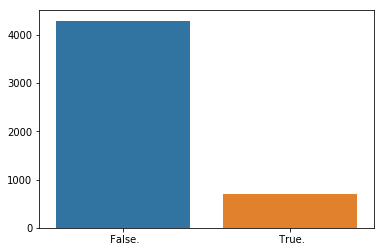

In [11]:
y = df['Churn'].value_counts()
sns.barplot(y.index, y.values)

<p><b>Step 5:</b> Visualize with the help of a pie plot, the percentage of churn in the dataset.</p>

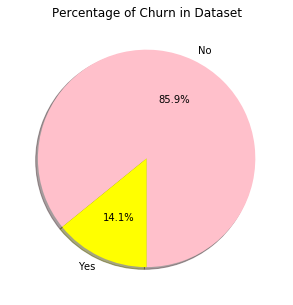

In [12]:
sizes = df['Churn'].value_counts(sort = True)
colors = ['pink', 'yellow']
rcParams['figure.figsize'] = 5,5
labels = ['No', 'Yes']
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

<p><b>Step 6:</b> Describe the features of the dataset (i.e, count, mean, standar deviation, etc.).</p>

In [13]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<p><b>Step 7:</b> Visualize the churn by state.</p>

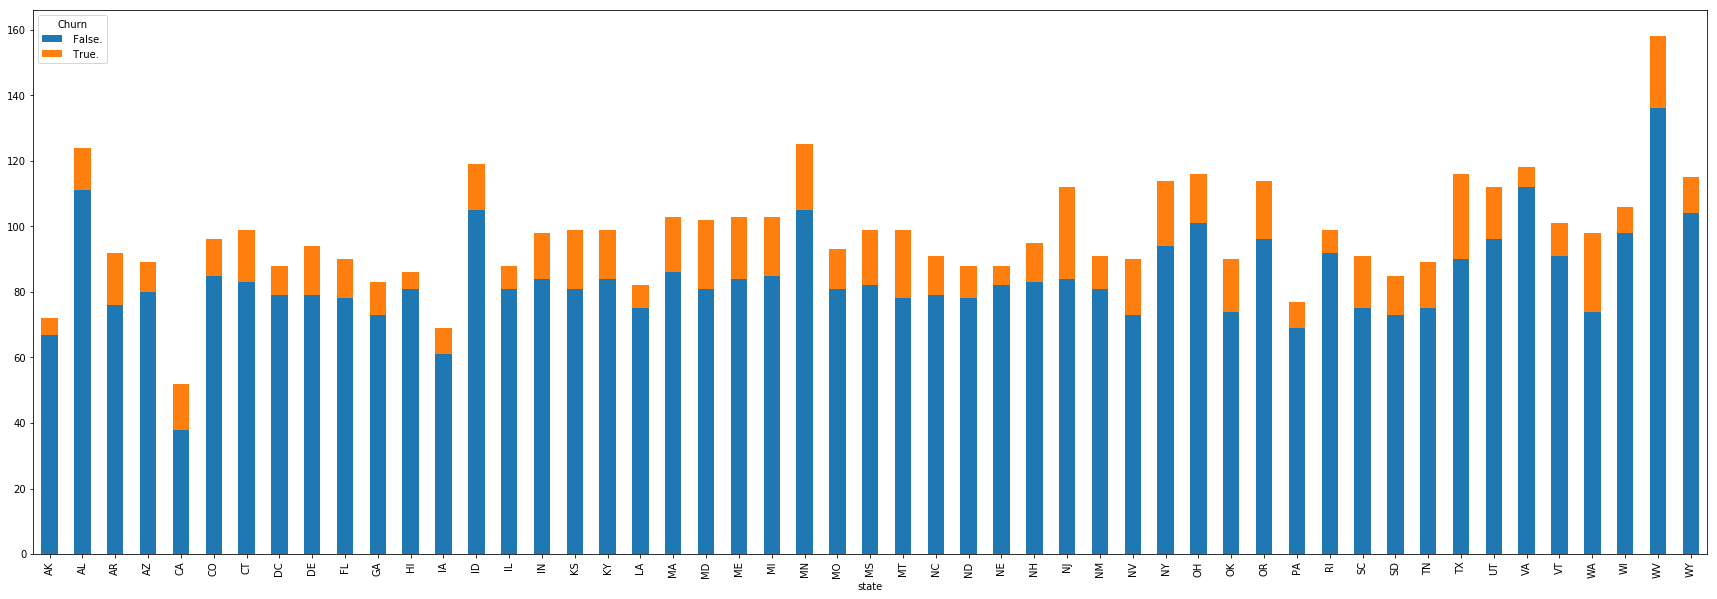

In [14]:
df.groupby(['state', 'Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

<p><b>Step 8:</b> Visualize the churn by area code.</p>

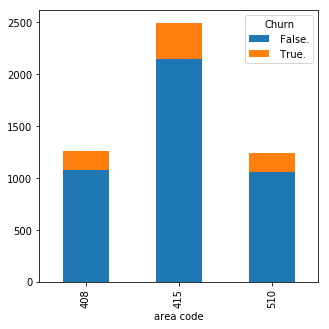

In [15]:
df.groupby(['area code', 'Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

<p><b>Step 9:</b> Visualize the churn by international plan.</p>

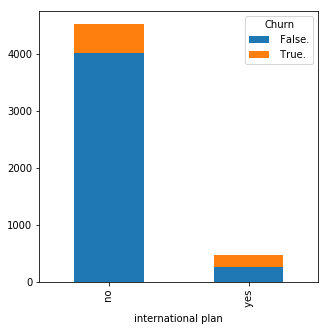

In [16]:
df.groupby(['international plan', 'Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

<p><b>Step 10:</b> Visualize the churn by voice mail plan.</p>

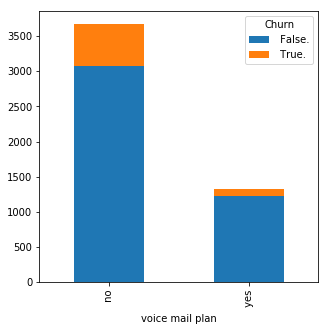

In [17]:
df.groupby(['voice mail plan', 'Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

<p><b>Step 11:</b> Convert categorical data in the dataset into numerical data for the purpose of calculation.</p>

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])
df.dtypes

state                              int64
account length                     int64
area code                          int64
phone number                      object
international plan                 int64
voice mail plan                    int64
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                              int64
dtype: object

In [20]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


<p><b>Step 12:</b> Create a variable y and save the churn feature as a integer matrix in it.</p>

In [21]:
y = df['Churn'].as_matrix().astype(np.int)
y.size

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


5000

<p><b>Step 13:</b> Drop the features that are no longer necessary in the dataset. <br><b>Note:</b> we are dropping the 'Churn' feature because we have already created a matrix for it.</p>

In [22]:
df.drop(['phone number', 'Churn'], axis=1, inplace=True)

In [23]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


<p><b>Step 14:</b> Convert the rest of the dataset into an integer matrix form and save it in a variable X</p>

In [24]:
X = df.as_matrix().astype(np.float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [38]:
X

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [  7.  ,  61.  , 415.  , ...,   4.  ,   3.67,   1.  ],
       [  7.  , 109.  , 510.  , ...,   6.  ,   2.3 ,   0.  ],
       [ 46.  ,  86.  , 415.  , ...,  16.  ,   2.51,   0.  ]])

In [39]:
X.shape

(5000, 19)

<p><b>Step 15:</b> Normalize the data in the matrix X.</p>

In [42]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.6754763 ,  0.69894149, -0.51916645, ..., -0.58423577,
        -0.0955088 , -0.43667564],
       [ 0.60813405,  0.16984882, -0.51916645, ..., -0.58423577,
         1.24598231, -0.43667564],
       [ 0.33790029,  0.92569549, -0.51916645, ...,  0.22991664,
         0.69597096, -1.20223603],
       ...,
       [-1.28350225, -0.98911606, -0.51916645, ..., -0.17715957,
         1.20573758, -0.43667564],
       [-1.28350225,  0.2202386 ,  1.73175375, ...,  0.63699285,
        -0.63210525, -1.20223603],
       [ 1.35127687, -0.35924384, -0.51916645, ...,  4.70775494,
        -0.35039211, -1.20223603]])

<p><b>Step 16:</b> Divide the data set into training and testing data by the ratio 70/30.</p>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<p><b>Step 17:</b> Create the Logistic Regression model and fit the training data.</p>

In [52]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<p><b>Step 18:</b> Make prediction of customer churn using test data and measure the accuracy of the prediction.</p>

In [54]:
prediction_test = model.predict(X_test)
acc = metrics.accuracy_score(y_test, prediction_test)
final_result = round((float(acc) * 100), 2)
print('Accuracy of the model is: ', final_result, '%')

Accuracy of the model is:  85.87 %


<p><b>Step 19:</b> Measure the precision, recall and f1 score of the model for this data set.</p>

In [64]:
precision = metrics.precision_score(y_test, prediction_test)
recall = metrics.recall_score(y_test, prediction_test)
f1 = metrics.f1_score(y_test, prediction_test)

In [69]:
print('Precision Score:', round((precision * 100), 2), '%')
print('Recall Score:', round((recall * 100), 2), '%')
print('f1 Score:', round((f1 * 100), 2), '%')

Precision Score: 44.58 %
Recall Score: 18.23 %
f1 Score: 25.87 %
